In [13]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

In [25]:
audio, sr = librosa.load('./test_sounds/flute_acoustic_026-083-127.wav', sr=16000)
audio = audio[0:16256]

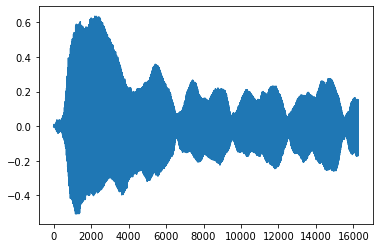

In [26]:
plt.plot(audio)

In [27]:
ipd.Audio(audio, rate=sr)


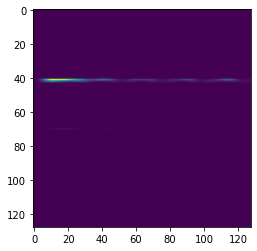

In [40]:
S = librosa.feature.melspectrogram(audio, sr=sr, n_fft=2056, hop_length=128)
S.shape

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

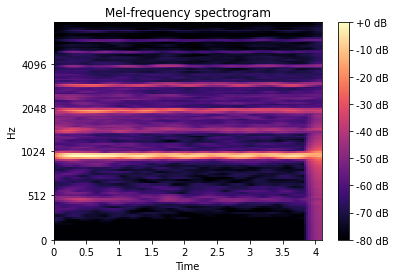

In [37]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

1.0


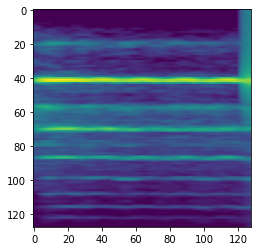

In [64]:
img = (S_dB - S_dB.min()) / (-S_dB.min())
print(img.max())
plt.imshow(img)

In [75]:
re_spec = librosa.db_to_power((img * 80.0) - 80.0)
re_audio = librosa.feature.inverse.mel_to_audio(re_spec, sr=sr, n_fft=2056, hop_length=128)

In [76]:
ipd.Audio(re_audio, rate=sr)